___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.7


In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install tensorflow==2.0

In [ ]:
# !pip install --ignore-installed --upgrade tensorflow==2.6

In [3]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.shape

(1000, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


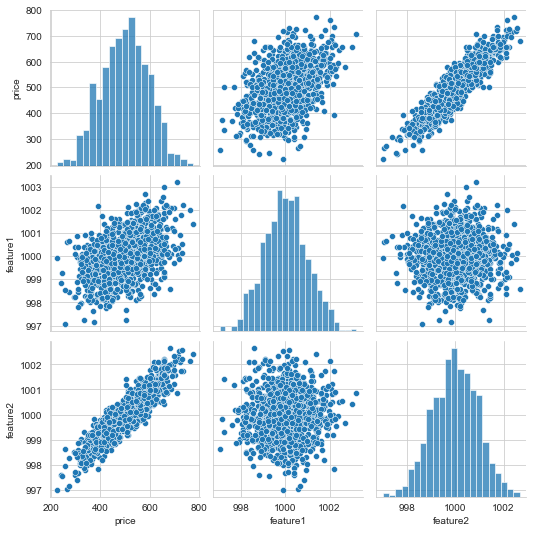

In [10]:
sns.pairplot(df);

In [11]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

# deep learning'de dataframe olarak degil array olarak gondermemiz gerekiyor

In [14]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [17]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(700, 2)

In [20]:
X_test.shape

(300, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# deep learning'de genelde minmaxscaler kullanilir
# DL'de scale kesinlikle yapilmali

In [21]:
help(MinMaxScaler)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Help on LazyImport in module pyforest._importable:

MinMaxScaler = active pyforest.LazyImport of <class 'sklearn.preprocessing._data.MinMaxScaler'>
    Transform features by scaling each feature to a given range.
    
    This estimator scales and translates each feature individually such
    that it is in the given range on the training set, e.g. between
    zero and one.
    
    The transformation is given by::
    
        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        X_scaled = X_std * (max - min) + min
    
    where min, max = feature_range.
    
    This transformation is often used as an alternative to zero mean,
    unit variance scaling.
    
    Read more in the :ref:`User Guide <preprocessing_scaler>`.
    
    Parameters
    ----------
    feature_range : tuple (min, max), default=(0, 1)
        Desired range of transformed data.
    
    copy : bool, default=True
        Set to False to perform inplace row normalization and avoid a
        copy (i

In [22]:
scaler = MinMaxScaler()

<IPython.core.display.Javascript object>

In [23]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.max()

1.0

In [25]:
X_train.min()

0.0

In [26]:
X_test.max()

1.0186515935232023

In [27]:
X_test.min()

-0.014108392024525074

## Modelling

In [28]:
import tensorflow as tf

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# sequential art arda layer'larin oldugu genel bir structure olusturmamizi sagliyor
# dense ise bir layer cinsidir. Artificial neural network'de en sik kullanilan tur dense

In [30]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [31]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [32]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

2022-03-05 16:03:26.536219: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))
# model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

# regresyon oldugu icin output layer bir tane noron iceriyor

# input layer'i yukaridaki sekilde belirtebiliriz, belirtmesek de calisir

In [35]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [36]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

# validation vermek zorunda degiliz

# buradaki loss 22'inci iterasyonda elde edilen loss degeri

# train seti sayisi 700, 700/32=21.8'den 22, her bir backpropagation icin 22 observation
# inceleniyor ve hata ortalamasi aliniyor, bu hata ort.na gore agirliklar guncelleniyor.

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256064.3438
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 255634.3125
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255202.2812
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 254740.4844
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 254247.2656
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 253716.1562
Epoch 7/250
22/22 [==============================] - 0s 4ms/step - loss: 253151.1250
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 252538.8125
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 251860.9844
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 251106.7656
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 250264.6406
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 4ms/step - loss: 695.5022
Epoch 98/250
22/22 [==============================] - 0s 5ms/step - loss: 663.4625
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 632.0629
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 605.6326
Epoch 101/250
22/22 [==============================] - 0s 4ms/step - loss: 576.2805
Epoch 102/250
22/22 [==============================] - 0s 4ms/step - loss: 544.3802
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 517.7371
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 491.9371
Epoch 105/250
22/22 [==============================] - 0s 4ms/step - loss: 465.0851
Epoch 106/250
22/22 [==============================] - 0s 4ms/step - loss: 438.5689
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 413.1709
Epoch 108/250
22/22 [==============================] - 0s 3ms/step - loss: 389.9228
Epoch 10

22/22 [==============================] - 0s 2ms/step - loss: 24.2970
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4643
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1358
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5499
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2639
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6376
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1336
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 24.2198
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7345
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0989
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4302
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3697
Epoch 207/250
22/2

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.weights

# weights en dusuk loss'un elde edildiginde elde edilen weights

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.170282  , -0.5180805 ,  1.7422756 ,  1.084687  ],
        [ 2.3956716 , -0.36761308,  2.9174898 ,  2.9990568 ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([0.37226498, 0.        , 0.69425166, 0.4330446 ], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.15420121,  0.71212924,  0.94812167,  2.4906664 ],
        [ 0.32148665, -0.23800719, -0.3740719 , -0.41600955],
        [-0.8017288 , -0.84939647,  2.5063164 ,  1.9047554 ],
        [ 0.47367865,  0.36261642,  1.572626  ,  1.8387218 ]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.09442005,  0.68387157,  0.68900627], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.4729657 , -0.25462234,  0.8205326 ,  0.70162934],
        [-0.44660196, -0.16012785, 

In [39]:
model.history.history

{'loss': [256064.34375,
  255634.3125,
  255202.28125,
  254740.484375,
  254247.265625,
  253716.15625,
  253151.125,
  252538.8125,
  251860.984375,
  251106.765625,
  250264.640625,
  249325.1875,
  248283.46875,
  247143.5,
  245885.921875,
  244515.9375,
  243015.171875,
  241385.875,
  239614.328125,
  237695.0,
  235642.5625,
  233425.1875,
  231027.15625,
  228488.453125,
  225777.390625,
  222868.015625,
  219791.15625,
  216526.28125,
  213064.953125,
  209399.5625,
  205533.96875,
  201477.0,
  197226.234375,
  192736.84375,
  188067.984375,
  183165.125,
  178080.359375,
  172791.0625,
  167288.484375,
  161635.671875,
  155751.78125,
  149689.328125,
  143482.6875,
  137065.484375,
  130531.84375,
  123891.2890625,
  117092.7421875,
  110193.90625,
  103206.6484375,
  96151.15625,
  89087.09375,
  82050.5390625,
  74985.8203125,
  67969.5,
  61130.28515625,
  54408.765625,
  47793.9375,
  41438.671875,
  35381.82421875,
  29633.982421875,
  24253.994140625,
  19318.1875,
 

In [40]:
pd.DataFrame(model.history.history)

,loss
0,256064.344
1,255634.312
2,255202.281
3,254740.484
4,254247.266
...,...
245,24.602
246,24.779
247,24.388
248,24.228


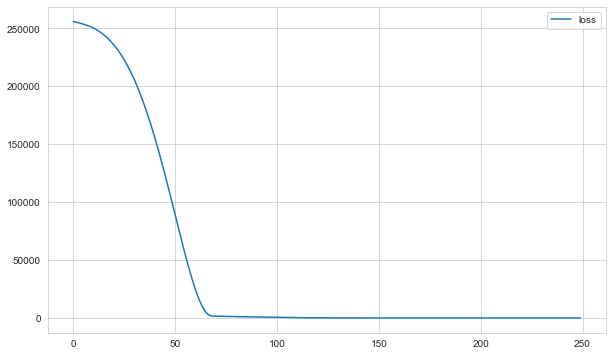

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

(0.0, 3000.0)

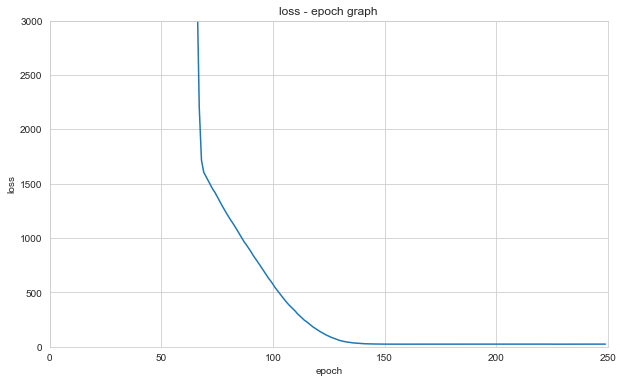

In [43]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [45]:
model.evaluate(X_train, y_train, verbose=0)

# compile icerisinde loss icin ne yazdiysam ona gore elde edilen optimal degeri verir
# burada mse degerini veriyor

# model.evaluate dendiginde arka planda kendisi prediction yaparak bu sonucu veriyor

25.082014083862305

In [46]:
model.evaluate(X_test, y_test, verbose=0)

27.54279899597168

In [47]:
y_pred = model.predict(X_test)

In [48]:
explained_variance_score(y_test, y_pred)

# explained_variance r2 ile cok benzer

0.9971447616251575

In [49]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
44,503.514,503.466
152,480.877,475.644
124,469.073,481.038
121,502.847,504.672
4,371.224,367.668
226,603.888,607.317
271,444.945,449.342
290,594.840,600.076
58,455.140,448.391
180,547.073,543.574


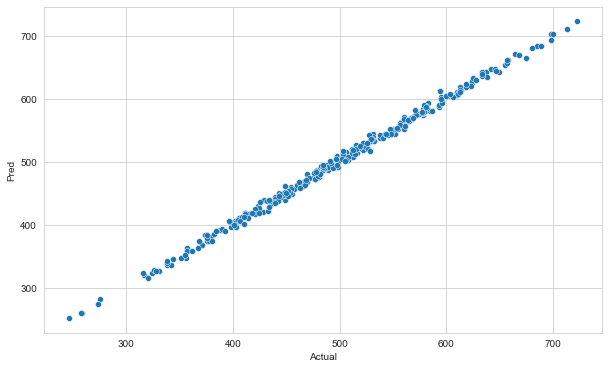

In [51]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [52]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [53]:
eval_metric(y_test, y_pred)

r2_score: 0.9968672985904542 
mae: 4.259654673408373 
mse: 27.542809991009957 
rmse: 5.248124426022115


## Final Model and Model Deployment

In [54]:
scaler = MinMaxScaler().fit(X)

<IPython.core.display.Javascript object>

In [55]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [56]:
X_scaled = scaler.transform(X)

In [57]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257604.5781
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 257299.0312
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257040.0156
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 256759.1719
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 256433.8594
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 256037.7656
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 255544.1562
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 254943.5625
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 254233.3594
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 253400.6875
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 252428.5000
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 3ms/step - loss: 282.4557
Epoch 98/250
32/32 [==============================] - 0s 2ms/step - loss: 263.5106
Epoch 99/250
32/32 [==============================] - 0s 2ms/step - loss: 246.6186
Epoch 100/250
32/32 [==============================] - 0s 3ms/step - loss: 229.9157
Epoch 101/250
32/32 [==============================] - 0s 2ms/step - loss: 213.4947
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 197.4653
Epoch 103/250
32/32 [==============================] - 0s 3ms/step - loss: 181.8441
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 167.5829
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 153.9884
Epoch 106/250
32/32 [==============================] - 0s 2ms/step - loss: 141.0831
Epoch 107/250
32/32 [==============================] - 0s 2ms/step - loss: 128.0264
Epoch 108/250
32/32 [==============================] - 0s 3ms/step - loss: 117.6834
Epoch 10

32/32 [==============================] - 0s 3ms/step - loss: 24.6084
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6219
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4904
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.3789
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8164
Epoch 200/250
32/32 [==============================] - 0s 3ms/step - loss: 24.7135
Epoch 201/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6605
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9028
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4731
Epoch 204/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6513
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.3075
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9192
Epoch 207/250
32/3

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [61]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

# modeli h5 uzantisiyla kaydetmek gerekiyor

## Prediction-1

In [60]:
from tensorflow.keras.models import load_model

In [62]:
model_fake_reg = load_model('model_fake_reg.h5')

In [63]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [64]:
sample = [[998, 1000]]

# array formunda olmasi gerekiyor

In [65]:
sample_scaled = scaler_fake_reg.transform(sample)

In [66]:
model_fake_reg.predict(sample_scaled)

array([[418.8587]], dtype=float32)

## Prediction-2

In [67]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [68]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [69]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

# scale islemi otomatik olarak array'e donusturuyor

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [70]:
model_fake_reg.predict(sample_scaled)

array([[378.77267],
       [330.48523],
       [282.19788],
       [233.91045],
       [183.88554]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___